In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.available
plt.style.use('seaborn')

In [113]:
df = pd.read_csv('dadosLimpos.csv',encoding='latin1', parse_dates=['DATA'])


In [114]:
df.head()

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,MAIOR_QUE_100
0,2016,1,13,ACIR GURGACZ,Aluguel de Imoveis,05.914.650/0001-66,ELETROBRÃS DISTRIBUIÃÃO RONDÃNIA,000011328,2016-01-13,Despesa com pagamento de energia elÃ©trica par...,73.60,0
1,2016,1,18,ACIR GURGACZ,Aluguel de Imoveis,05.914.650/0001-66,ELETROBRÃS DISTRIBUIÃÃO RONDÃNIA,000011327,2016-01-18,Pagamento de energia elÃ©trica para o escritÃ³...,206.84,1
2,2016,1,1,ACIR GURGACZ,Aluguel de Imoveis,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,2016-04-01,"Despesa com pagamento de aluguel, utilizado pa...",6000.00,1
3,2016,1,16,ACIR GURGACZ,Aluguel de Imoveis,05.423.963/0001-11,OI MÃVEL S.A.,661639001,2016-01-16,despesa com pagamento de telefonia para o escr...,407.48,1
4,2016,1,1,ACIR GURGACZ,NaN,62.652.961/0001-38,AGÃNCIA ESTADO S.A.,00608918,2016-06-01,AquisiÃ§Ã£o de publicaÃ§Ã£o virtual de conteÃº...,550.00,1


In [115]:
df['DATA'] = pd.to_datetime(df['DATA'])

In [116]:
df.dtypes

ANO                           int64
MES                           int64
DIA                           int64
SENADOR                      object
TIPO_DESPESA                 object
CNPJ_CPF                     object
FORNECEDOR                   object
DOCUMENTO                    object
DATA                 datetime64[ns]
DETALHAMENTO                 object
VALOR_REEMBOLSADO           float64
MAIOR_QUE_100                 int64
dtype: object

In [117]:
df.describe()

,ANO,MES,DIA,VALOR_REEMBOLSADO,MAIOR_QUE_100
count,26691.0,26691.000000,26691.000000,26691.000000,26691.000000
mean,2016.0,6.470908,15.431419,947.484513,0.784085
std,0.0,3.257134,8.847378,2733.820037,0.411464
min,2016.0,1.000000,1.000000,0.010000,0.000000
25%,2016.0,4.000000,8.000000,124.000000,1.000000
50%,2016.0,6.000000,15.000000,324.790000,1.000000
75%,2016.0,9.000000,23.000000,956.865000,1.000000
max,2016.0,12.000000,31.000000,256980.000000,1.000000


In [118]:
df.loc[df['VALOR_REEMBOLSADO'] > 200000]

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,MAIOR_QUE_100
4637,2016,12,22,DAVI ALCOLUMBRE,Divulgacao,04.953.008/0001-23,ARTE & IMAGEM GRAFICA E EDITORA EIRELI ME,202,2017-03-22,NaN,256980.0,1


In [119]:
df.loc[df['VALOR_REEMBOLSADO'] == 0.01].head()

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,MAIOR_QUE_100
6847,2016,3,22,FERNANDO BEZERRA COELHO,Passagens,07.575.651/0001-59,GOL,NFPJ4Z,2016-03-22,"Companhia AÃ©rea: GOL, Localizador: NFPJ4Z. Pa...",0.01,0
6848,2016,3,30,FERNANDO BEZERRA COELHO,Passagens,07.575.651/0001-59,GOL,OEI85P,2016-03-30,"Companhia AÃ©rea: GOL, Localizador: OEI85P. Pa...",0.01,0
11278,2016,6,6,JORGE VIANA,Passagens,33.937.681/0001-78,LATAM,3EY28M,2016-02-06,"Companhia AÃ©rea: LATAM, Localizador: 3EY28M. ...",0.01,0
11494,2016,12,17,JORGE VIANA,Passagens,07.575.651/0001-59,GOL TRANSPORTES AÃREOS S/A,NCNMYL,2016-10-17,"Companhia AÃ©rea: GOL, Localizador: NCNMYL. Pa...",0.01,0
18749,2016,6,21,PEDRO CHAVES DOS SANTOS FILHO,Passagens,12.281.922/0001-01,Via Berrini Turismo e Eventos Ltda ME,FT00020270,2016-07-21,"Companhia AÃ©rea: AZUL, Localizador: PYZD4M. P...",0.01,0


In [120]:
df.loc[df['TIPO_DESPESA'] ==  'Divulgacao'].describe()

,ANO,MES,DIA,VALOR_REEMBOLSADO,MAIOR_QUE_100
count,1083.0,1083.000000,1083.000000,1083.000000,1083.000000
mean,2016.0,6.747922,15.841182,3310.679400,0.986150
std,0.0,3.434922,8.707863,9795.249986,0.116924
min,2016.0,1.000000,1.000000,24.650000,0.000000
25%,2016.0,4.000000,8.000000,853.500000,1.000000
50%,2016.0,7.000000,15.000000,2000.000000,1.000000
75%,2016.0,10.000000,24.000000,3000.000000,1.000000
max,2016.0,12.000000,31.000000,256980.000000,1.000000


In [121]:
df.loc[(df['TIPO_DESPESA'] ==  'Divulgacao') & (df['VALOR_REEMBOLSADO'] > 3000)].describe()

,ANO,MES,DIA,VALOR_REEMBOLSADO,MAIOR_QUE_100
count,211.0,211.000000,211.000000,211.000000,211.0
mean,2016.0,6.753555,14.161137,11021.461611,1.0
std,0.0,3.478632,8.451126,20429.134459,0.0
min,2016.0,1.000000,1.000000,3115.000000,1.0
25%,2016.0,4.000000,7.000000,4584.000000,1.0
50%,2016.0,7.000000,13.000000,6500.000000,1.0
75%,2016.0,10.000000,21.000000,11710.000000,1.0
max,2016.0,12.000000,31.000000,256980.000000,1.0


In [122]:
df.head()

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,MAIOR_QUE_100
0,2016,1,13,ACIR GURGACZ,Aluguel de Imoveis,05.914.650/0001-66,ELETROBRÃS DISTRIBUIÃÃO RONDÃNIA,000011328,2016-01-13,Despesa com pagamento de energia elÃ©trica par...,73.60,0
1,2016,1,18,ACIR GURGACZ,Aluguel de Imoveis,05.914.650/0001-66,ELETROBRÃS DISTRIBUIÃÃO RONDÃNIA,000011327,2016-01-18,Pagamento de energia elÃ©trica para o escritÃ³...,206.84,1
2,2016,1,1,ACIR GURGACZ,Aluguel de Imoveis,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,2016-04-01,"Despesa com pagamento de aluguel, utilizado pa...",6000.00,1
3,2016,1,16,ACIR GURGACZ,Aluguel de Imoveis,05.423.963/0001-11,OI MÃVEL S.A.,661639001,2016-01-16,despesa com pagamento de telefonia para o escr...,407.48,1
4,2016,1,1,ACIR GURGACZ,NaN,62.652.961/0001-38,AGÃNCIA ESTADO S.A.,00608918,2016-06-01,AquisiÃ§Ã£o de publicaÃ§Ã£o virtual de conteÃº...,550.00,1


In [123]:
gastos_senadores = df.groupby('SENADOR')

In [124]:
gastos_senadores = gastos_senadores['VALOR_REEMBOLSADO'].sum().sort_values(ascending = False)

In [125]:
top_10_senadores = gastos_senadores.head(10)

In [126]:
top_10_senadores

SENADOR
DAVI ALCOLUMBRE       510076.07
JOÃO CAPIBERIBE      502997.57
TELMÃRIO MOTA        488678.92
PAULO ROCHA           485114.40
VANESSA GRAZZIOTIN    477079.76
RANDOLFE RODRIGUES    471847.84
SÃRGIO PETECÃO      463456.45
GLADSON CAMELI        459977.83
ROMERO JUCÃ          446448.98
CIRO NOGUEIRA         440047.81
Name: VALOR_REEMBOLSADO, dtype: float64

In [127]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

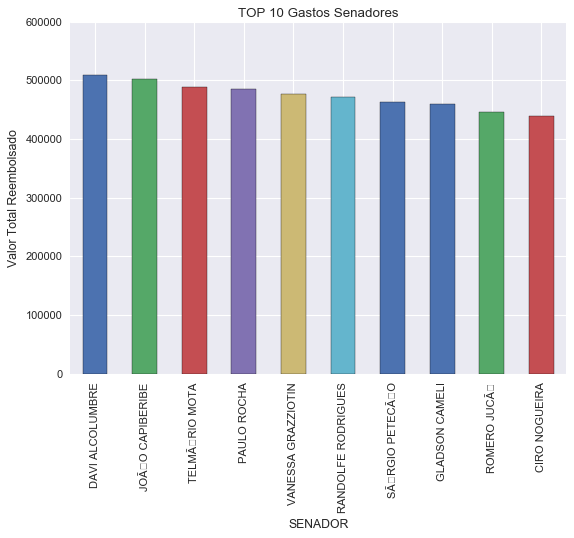

In [128]:
top_10_senadores.plot(kind='bar')
plt.title('TOP 10 Gastos Senadores')
plt.ylabel('Valor Total Reembolsado')
plt.show()

In [129]:
top_10_senadores.index


Index(['DAVI ALCOLUMBRE', 'JOÃO CAPIBERIBE', 'TELMÃRIO MOTA', 'PAULO ROCHA',
       'VANESSA GRAZZIOTIN', 'RANDOLFE RODRIGUES', 'SÃRGIO PETECÃO',
       'GLADSON CAMELI', 'ROMERO JUCÃ', 'CIRO NOGUEIRA'],
      dtype='object', name='SENADOR')

In [130]:
gastos_top_10 = df.loc[(df['SENADOR'].isin(top_10_senadores.index) & (df['VALOR_REEMBOLSADO'] < 70000))]

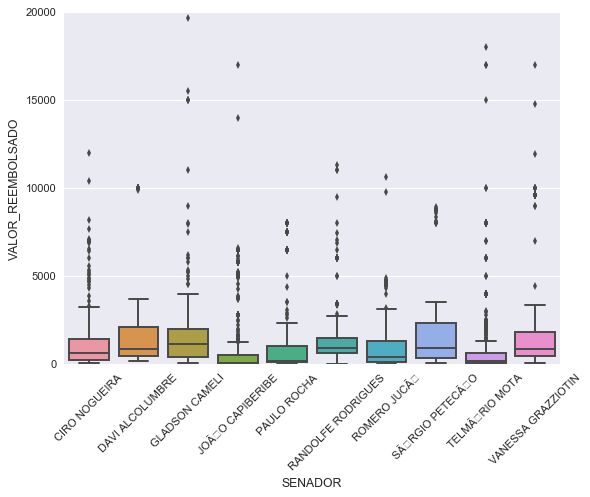

In [131]:
sns.boxplot(x=gastos_top_10['SENADOR'],y=gastos_top_10['VALOR_REEMBOLSADO'])
plt.xticks(rotation = 45)
plt.show()

In [133]:
mapa_de_calor = df

In [135]:
df.dtypes

ANO                           int64
MES                           int64
DIA                           int64
SENADOR                      object
TIPO_DESPESA                 object
CNPJ_CPF                     object
FORNECEDOR                   object
DOCUMENTO                    object
DATA                 datetime64[ns]
DETALHAMENTO                 object
VALOR_REEMBOLSADO           float64
MAIOR_QUE_100                 int64
dtype: object

In [136]:
mapa_de_calor['DATA'] = df['DATA'].dt.strftime('%Y-%m')

In [159]:
df_pivot = mapa_de_calor.pivot_table(
    index='DATA',
    columns='TIPO_DESPESA', 
    values='VALOR_REEMBOLSADO', 
    aggfunc=np.sum, 
    fill_value=0
    
)


In [160]:
df_pivot.head()

TIPO_DESPESA,Aluguel de Imoveis,Contratacoes,Divulgacao,Logistica,Passagens,Seguranca
DATA,,,,,,
1977-10,0.0,0.0,0.0,152.51,0.00,0.0
1986-03,0.0,0.0,0.0,139.16,0.00,0.0
2012-02,162.4,0.0,0.0,0.00,0.00,0.0
2013-09,0.0,0.0,0.0,675.00,0.00,0.0
2014-01,0.0,0.0,0.0,0.00,374.83,0.0


In [161]:
df_pivot = df_pivot.loc['2016-01':'2016-12']
df_pivot.head()

TIPO_DESPESA,Aluguel de Imoveis,Contratacoes,Divulgacao,Logistica,Passagens,Seguranca
DATA,,,,,,
2016-01,681720.72,519205.27,419496.30,878387.57,423176.74,284426.09
2016-02,355621.91,286143.29,252818.74,592530.48,487826.19,21832.40
2016-03,361367.60,255112.80,291705.97,440847.14,586842.49,33859.82
2016-04,392789.93,243225.69,224044.85,462978.26,549032.37,21978.24
2016-05,765999.20,275629.88,263856.45,476910.51,520546.83,39480.96


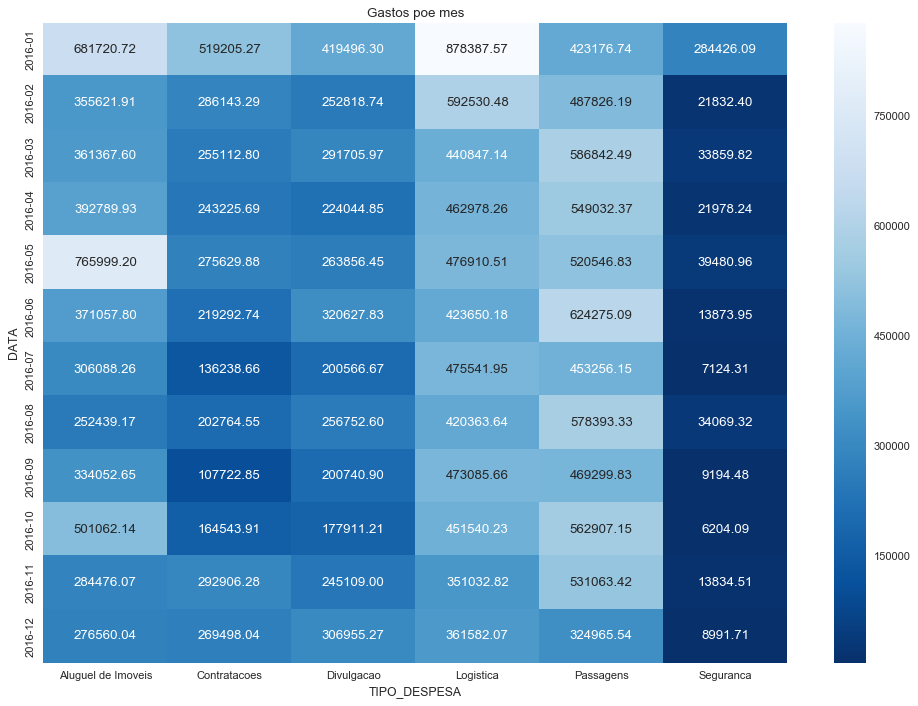

In [167]:
plt.figure(figsize=(15,10))
sns.heatmap(df_pivot, annot=True, fmt='.2f', cmap='Blues_r')
plt.title('Gastos poe mes')
plt.show()